In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [18]:
df = pd.read_csv('/Users/sarahcliff/Desktop/Sentinel/sentinel 1 new data/raw data/rpbh2sentinel_1@2022-03-03.csv')
y = df['Depth']
x = df['date']
mean = np.mean(y)

y_m = []
for i in range (0,len(y)):
    y_m.append(y[i]-mean)

<class 'numpy.ndarray'>
21


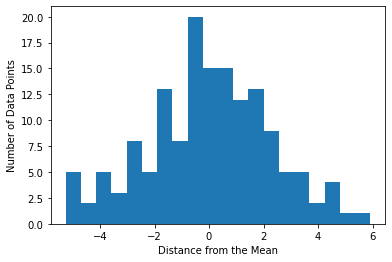

In [19]:
(n, bins, patches) = plt.hist(y_m, bins = 20, density = False)
plt.xlabel('Distance from the Mean')
plt.ylabel('Number of Data Points')
print(type(n))
print(len(bins))

In [20]:
ntest = np.asarray(n)
ntest = ntest.flatten()
error = np.std(ntest)/np.sqrt(len(ntest))
csfont = {'fontname':'Times New Roman'}

In [21]:
def chsquare_gauss(x,y,yerr, initial_values):
    def gauss_model(x, param_vals):
        return param_vals[1] * 1./(np.sqrt(2.*np.pi)*param_vals[0])*np.exp(-np.power((x - 0)/param_vals[0], 2.)/2)
    def chi_squared(model_params, model, x, y, yerr):
        return np.sum((y - gauss_model(x, model_params))**2/yerr**2)
    deg_freedom = y.size - initial_values.size # Make sure you understand why!
    fit = scipy.optimize.minimize(chi_squared, initial_values, args=(gauss_model, x,y, yerr))

    a_solution = fit.x[0]
    b_solution = fit.x[1]
    chisq_min = chi_squared([a_solution, b_solution], gauss_model, x, y, yerr)
    chisq_reduced = chisq_min/deg_freedom
    
    fit_line = b_solution * 1./(np.sqrt(2.*np.pi)*a_solution)*np.exp(-np.power((x - 0)/a_solution, 2.)/2)
    chisq_min = np.sum((y - fit_line)**2/yerr**2)
    chisq_reduced = chisq_min/deg_freedom
    
    plt.figure(figsize=(8,6))
    plt.plot(x, 
             y)
    plt.plot(x, fit_line, 'r')
    plt.xlabel('Distance from Mean (cm)', **csfont, fontsize = 14) # Axis labels
    plt.ylabel('Number of Data Points', **csfont, fontsize = 14)

    return a_solution, b_solution, chisq_reduced

2.264715718882654 83.84571297249205 5.309369464430592


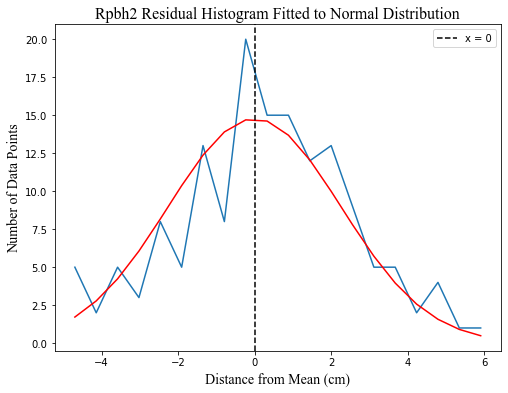

In [23]:
std, amp, chi = chsquare_gauss(bins[1:], ntest, error, np.array([2,250]))
print(std, amp, chi)
plt.title('Rpbh2 Residual Histogram Fitted to Normal Distribution', **csfont, fontsize = 16)
plt.axvline(0, color='k', ls='--', label = 'x = 0') 
plt.legend()